In [1]:
import numpy as np
import math

# Вычислительные эксперименты, иллюстрирующие явление концентрации равномерной меры на поверхности евклидовой сферы в малой окрестности экватора

<i>Статья:</i>
<br/>
<i>Горбунов Э.А.</i>
<br/>
<i>МФТИ (Москва, Россия),</i>
<br/>
<i>Воронцова Е.А.</i>
<br/>
<i>ДВФУ (Владивосток, Россия),</i>
<br/>
<br/>
<i>arxiv (in process)</i>

In [2]:
def montecarlo(f, X, q, n, eps, gr = False):
    """
    Function to compute the Monte Carlo estimate of the expectation
    E[f(X)], with N samples
   
    Inputs:
    f - a Python function that applies a chosen mathematical function to
    each entry in a numpy array
    X - a Python function that takes N as input and returns
    independent individually distributed random samples from a chosen
    probability distribution
    N - the number of samples to use
    q -- additional parametr for f
    """
    N = 2
    Fx = [f(X(n), q, n)]
    mc_err = eps
    mc_int = 1
    
    if gr:
        plt_estint = []
        plt_esterr = []
    while mc_err >= eps:
        
        Fx.append(f(X(n), q, n))
        mc_int = np.sum(Fx) / N
        mc_err = math.sqrt(sum(pow(Fx-mc_int, 2))) / N
        
        if gr:
            plt_estint.append(mc_int)
            plt_esterr.append(mc_err) 
        
        N += 1

    if gr:    
        
        %matplotlib notebook
        import matplotlib.pyplot as plt
        plt.grid(True)
        plt.plot(range(2, N), plt_estint, label = 'mc_int')
        twope = [2*pe for pe in plt_esterr]
        mtwope = [-2*pe for pe in plt_esterr]
        plt.plot(range(2, N), [sum(pe) for pe in zip(plt_estint, twope)])
        plt.plot(range(2, N), [sum(pe) for pe in zip(plt_estint, mtwope)])
        plt.legend()        

    return mc_int, N-1

In [3]:
def func(e, q, n):
    # Inputs:  
    # e - a numpy array of values
    # q - norm
    # n - length of e
    norm_e = np.linalg.norm(e, q)
    sq = norm_e*norm_e
    if q == np.inf:
        return sq  / pow(n, -1.0)
    else:    
        return sq  / pow(n, 2./q - 1)

In [4]:
# Generating uniformly distributed numbers on a sphere
def get_rand_vec(dims):
    e = np.random.standard_normal(int(dims))
    return e / np.linalg.norm(e)

In [5]:
nrange = range(10, int(1e5), 10)
narr = np.array(nrange)

plt1 = []
q = np.inf
for i, n in enumerate(narr):
    
    pract_estimate, N = montecarlo(func, get_rand_vec, q, n, 1e-1, False) 
    if q == np.inf:
        theor_estimate = 16*math.log(n) - 8 #* n2q
    else:
        theor_estimate = min([q - 1, 16*math.log(n) - 8]) #* n2q
    plt1.append(pract_estimate / theor_estimate)
    #print('n = ', n, ', pract  = ', pract_estimate, ', from lemma = ', theor_estimate, N) 
        


<IPython.core.display.Javascript object>


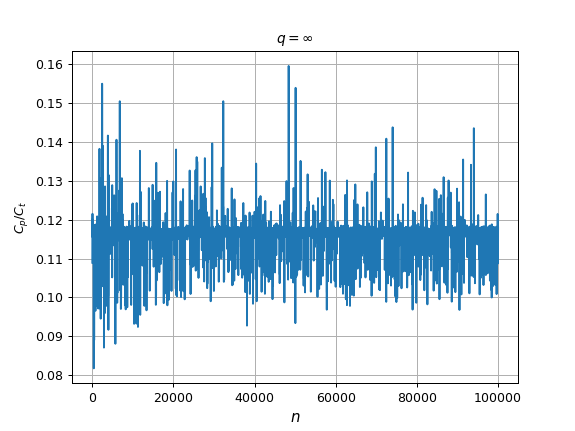

In [24]:
%matplotlib notebook
import matplotlib.pyplot as plt
plt.grid(True)
plt.plot(nrange, plt1)
plt.xlabel(r"$n$", fontsize=12)
plt.ylabel(r"$C_p/C_t$", fontsize=10)
plt.title(r"$q = \infty$", fontsize = 11);
#plt.legend()